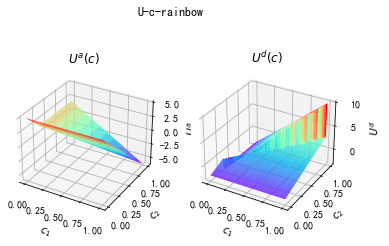

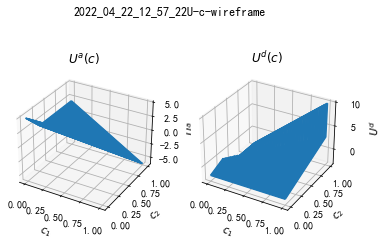

AttributeError: 'Landscape' object has no attribute 'U_c_Axes3D'

In [1]:
from multiprocessing.pool import TERMINATE
from re import T
from select import select
from tkinter import N
from tracemalloc import stop
from turtle import Turtle
from typing import Dict
from matplotlib import projections

import numpy as np

import json
import os
import sys
# sys.path.append('/home/wuyp/Projects/pymoo/')
sys.path.append('/home/haohao/Project_wuyp/MOSG/pymoo/')
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

from pymoo.util.termination import max_gen
from typing import *

import tool.algorithm
from pymoo.algorithms.nsga3 import NSGA3
from pymoo.factory import get_problem, get_reference_directions, get_sampling, get_crossover, get_mutation, get_termination
from pymoo.model.result import Result
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.MOSGsGeneticSolver.visualization import Visualization
from pymoo.MOSGsGeneticSolver.resSave import resSave

from pymoo.algorithms.mosg_genetic_nsga3 import MOSGG
from securitygame_core.MO_security_game import MOSG
from pymoo.MOSGsGeneticSolver.truing import Truing

RES_DIR = os.path.join(os.getcwd(), 'Results', 'figures')

class Landscape():
    def __init__(self, RES_DIR=['Results', 'landscape_demo']):
        self.RES_DIR = os.getcwd()
        for i in range(len(RES_DIR)):
            self.RES_DIR = os.path.join(self.RES_DIR, RES_DIR[i])

    # U-ct
    def U_ct_3d(self):
        I = 0
        problem1 = MOSG(player_num=2, target_num=1)
        x = np.linspace(start=0, stop=1, num=10)
        payoff_attacker = []
        payoff_defender = []
        for xi in x:
            problem1.set_ct(xi)
            problem1.cal_payoff()
            problem1.cal_payoff_attacker()
            problem1.cal_payoff_defender()
            payoff_attacker.append(problem1.get_payoff_attacker()[0])
            payoff_defender.append(problem1.get_payoff_defender()[0])
        plt.xlabel('$c_t$')
        plt.ylabel('$U^{a/d}$')
        plt.plot(x, payoff_attacker, label='$U^a(c_t)$')
        plt.plot(x, payoff_defender, label='$U^d(c_t)$')
        plt.legend(loc='best')
        fname = 'U-ct'
        plt.savefig(os.path.join(self.RES_DIR, fname))
        # plt.show()

    # 绘制一张U-c的3d，c变量，3d中变量c的维度为2
    def U_c_3d_rainbow(self, rstride=1):
        problem2 = MOSG(player_num=2, target_num=2)
        x1 = np.linspace(0, 1, 100)
        x2 = np.linspace(0, 1, 100)
        # 网格化操作，将原有1维的x1,x2变成2维
        X1, X2 = np.meshgrid(x1, x2)
        payoff_attacker = np.empty_like(X1)
        payoff_defender = np.empty_like(X1)
        for i in range(len(x1)):
            for j in range(len(X2)):
                problem2.set_ct(np.array([x1[i], x2[j]]))
                problem2.cal_payoff()
                problem2.cal_payoff_attacker()
                problem2.cal_payoff_defender()
                payoff_attacker[i, j] = problem2.get_payoff_attacker()
                payoff_defender[i, j] = problem2.get_payoff_defender()
        # 多子图
        fname='U-c-rainbow'
        fig = plt.figure()
        fig.suptitle(fname)
        fname = tool.algorithm.getTime() + fname
        ax1 = plt.subplot2grid((1,2), (0,0), projection='3d')
        ax2 = plt.subplot2grid((1,2), (0,1), projection='3d')
        # 基本设定
        ax1.set_xlabel('$c_1$')
        ax1.set_ylabel('$c_2$')
        ax1.set_zlabel('$U^{a}$')
        ax2.set_xlabel('$c_1$')
        ax2.set_ylabel('$c_2$')
        ax2.set_zlabel('$U^{d}$')
        ax1.set_title('$U^a(c)$')
        ax2.set_title('$U^d(c)$')
        # 绘图
        ax1.plot_surface(X1, X2, payoff_attacker, rstride=rstride, cmap='rainbow', label='$U^a(c)$')
        ax2.plot_surface(X1, X2, payoff_defender, rstride=rstride, cmap='rainbow', label='$U^d(c)$')
        # plt.legend(loc='best')
        # plt.savefig(os.path.join(self.RES_DIR, fname))
        plt.show()

    def U_c_3d_wireframe(self, rstride=5,  cstride=5):
        problem2 = MOSG(player_num=2, target_num=2)
        x1 = np.linspace(0, 1, 100)
        x2 = np.linspace(0, 1, 100)
        # 网格化操作，将原有1维的x1,x2变成2维
        X1, X2 = np.meshgrid(x1, x2)
        payoff_attacker = np.empty_like(X1)
        payoff_defender = np.empty_like(X1)
        for i in range(len(x1)):
            for j in range(len(x2)):
                problem2.set_ct(np.array([x1[i], x2[j]]))
                problem2.cal_payoff()
                problem2.cal_payoff_attacker()
                problem2.cal_payoff_defender()
                payoff_attacker[i, j] = problem2.get_payoff_attacker()
                payoff_defender[i, j] = problem2.get_payoff_defender()
        # 多子图
        fname='U-c-wireframe'
        fname = tool.algorithm.getTime() + fname
        fig = plt.figure()
        fig.suptitle(fname)

        ax1 = plt.subplot2grid((1,2), (0,0), projection='3d')
        ax2 = plt.subplot2grid((1,2), (0,1), projection='3d')
        # 基本设定
        ax1.set_xlabel('$c_1$')
        ax1.set_ylabel('$c_2$')
        ax1.set_zlabel('$U^{a}$')
        ax2.set_xlabel('$c_1$')
        ax2.set_ylabel('$c_2$')
        ax2.set_zlabel('$U^{d}$')
        ax1.set_title('$U^a(c)$')
        ax2.set_title('$U^d(c)$')
        # 绘图
        ax1.plot_wireframe(X1, X2, payoff_attacker, rstride=rstride, cstride=cstride, label='$U^a(c)$')
        ax2.plot_wireframe(X1, X2, payoff_defender, rstride=rstride, cstride=cstride, label='$U^d(c)$')
        # plt.legend(loc='best')
        # plt.savefig(os.path.join(self.RES_DIR, fname))
        plt.show()

    def U_c_hotmap(self):
        problem2 = MOSG(player_num=2, target_num=2)
        x1 = np.linspace(0, 1, 100)
        x2 = np.linspace(0, 1, 100)
        # 网格化操作，将原有1维的x1,x2变成2维
        X1, X2 = np.meshgrid(x1, x2)
        payoff_attacker = np.empty_like(X1)
        payoff_defender = np.empty_like(X1)
        for i in range(len(x1)):
            for j in range(len(x2)):
                problem2.set_ct(np.array([x1[i], x2[j]]))
                problem2.cal_payoff()
                problem2.cal_payoff_attacker()
                problem2.cal_payoff_defender()
                payoff_attacker[i, j] = problem2.get_payoff_attacker()
                payoff_defender[i, j] = problem2.get_payoff_defender()

        fig = plt.figure()
        ax = Axes3D(fig)
        # 基本设定
        ax.set_xlabel('$c_1$')
        ax.set_ylabel('$c_2$')
        ax.set_zlabel('$U^{a}$')
        ax.set_title('$U^a(c)$')
        ax.plot_wireframe(X1, X2, payoff_attacker, rstride=1, cstride=1, label='$U^a(c)$')
        plt.show()    # 渲染3D图显示


    # 绘制N张旋转的U-c的3d，c变量，3d中变量c的维度为2
    def U_c_3d_ratote(self):
        # 存在问题
        pass
        # 声明问题，定义c[c1, c2]，求U
        problem2 = MOSG(player_num=2, target_num=2)
        x1 = np.linspace(0, 1, 100)
        x2 = np.linspace(0, 1, 100)
        # 网格化操作，将原有1维的x1,x2变成2维
        X1, X2 = np.meshgrid(x1, x2)
        payoff_attacker = np.empty_like(X1)
        payoff_defender = np.empty_like(X1)
        for i in range(len(x1)):
            for j in range(len(x2)):
                problem2.set_ct(np.array([x1[i], x2[j]]))
                problem2.cal_payoff()
                problem2.cal_payoff_attacker()
                problem2.cal_payoff_defender()
                payoff_attacker[i, j] = problem2.get_payoff_attacker()
                payoff_defender[i, j] = problem2.get_payoff_defender()
        
        # 绘图基本信息  # 多子图
        fname='U-c'
        fig = plt.figure()
        fig.suptitle(fname)
        ax1 = plt.subplot2grid((1,2), (0,0), projection='3d')
        ax2 = plt.subplot2grid((1,2), (0,1), projection='3d')
        ax1.set_xlabel('$c_1$')
        ax1.set_ylabel('$c_2$')
        ax1.set_zlabel('$U^{a}$')
        ax2.set_xlabel('$c_1$')
        ax2.set_ylabel('$c_2$')
        ax2.set_zlabel('$U^{d}$')
        ax1.set_title('$U^a(c)$')
        ax2.set_title('$U^d(c)$')

        # 旋转不同角度绘制
        plt.ion()
        for i in range(30000):
            plt.clf()  # 清除之前画的图
            fig = plt.gcf()  # 获取当前图
            # ax1 = fig.gca(projection='3d')  # 获取当前轴
            # ax2 = fig.gca(projection='3d')  # 获取当前轴
            # 绘图
            ax1.plot_surface(X1, X2, payoff_attacker, rstride=1, cmap='rainbow', label='$U^a(c)$')
            ax2.plot_surface(X1, X2, payoff_defender, rstride=1, cmap='rainbow', label='$U^d(c)$')
            # plt.pause(0.001)  # 暂停一段时间，不然画的太快会卡住显示不出来
            plt.savefig(self.RES_DIR)
            print(i)
            plt.ioff()  # 关闭画图窗口

            # Z = Z - X1 + 2 * X2  # 变换Z值

        # 加这个的目的是绘制完后不让窗口关闭

lands = Landscape()
for i in range(1, 2, 1):
    lands.U_c_3d_rainbow(rstride=i)
    lands.U_c_3d_wireframe(rstride=i, cstride=i)
lands.U_c_Axes3D()

print(__name__, ' finish')


In [5]:

import sys
# sys.path.append('/home/wuyp/Projects/pymoo/')
sys.path.append('/home/haohao/Project_wuyp/MOSG/pymoo/')
import os
print(os.getcwd())
os.chdir('../..')
from pymoo.MOSGsGeneticSolver.convergence import Convergence


/home/wuyp/Projects/pymoo/pymoo/MOSGsGeneticSolver
入读数据： Results/obj5target25/GeneticMOSGinteger-Popsize20CodeintegerHistoryTrue-2022_04_22_12_52-27320.txt
pymoo.MOSGsGeneticSolver.convergence finish


In [8]:
name = []
path = []

# pf 
pf_path = 'Results/obj5target25/GeneticMOSGinteger-Popsize20CodeintegerHistoryTrue-2022_04_22_12_52-27320.txt'
pf_name = 'P20CiX0T2'

RES_DIR = ['Results','demo']
# conv = Convergence(pf_path, name=name, path=path, RES_DIR=RES_DIR)
conv = Convergence(pf=pf_path, name=name, path=path, pf_name=pf_name, RES_DIR=RES_DIR)

入读数据： Results/obj5target25/GeneticMOSGinteger-Popsize20CodeintegerHistoryTrue-2022_04_22_12_52-27320.txt


In [9]:
len(conv.pf_res.history)

160

In [11]:
conv.pf_res.history[0].opt.shape

(4,)

In [12]:
len(conv.pf_res.history[0].opt)

4

In [13]:
len(conv.pf_res.history[0].pop)

20